In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

## Read training data

In [3]:
df = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/LVNC-train.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Group            76 non-null     int64  
 1   End              76 non-null     int64  
 2   ID               76 non-null     int64  
 3   检查时间             76 non-null     object 
 4   Sex              76 non-null     int64  
 5   Age              76 non-null     int64  
 6   DL               76 non-null     int64  
 7   HT               76 non-null     int64  
 8   DM               76 non-null     int64  
 9   SM               76 non-null     int64  
 10  FH               76 non-null     int64  
 11  BMI              76 non-null     float64
 12  NYHA             76 non-null     int64  
 13  AR               76 non-null     int64  
 14  CVA              76 non-null     int64  
 15  DCM              76 non-null     int64  
 16  HCM              76 non-null     int64  
 17  RVCM             7

In [4]:
df.head()

,Group,End,ID,检查时间,Sex,Age,DL,HT,DM,SM,...,LVEF,LVEDV,LVESV,LVSV,CLVMI,NCC,Noseg,LGE,Rvabnormalities,RVNC
0,1,0,151,2012/1/17,1,15,0,0,0,1,...,61.6,189.88,72.91,116.97,61.50,4.72,13,0,0,1
1,1,0,23,2013/5/31,1,45,0,0,0,0,...,20.9,298.60,236.00,62.50,68.36,3.48,11,1,1,0
2,1,0,152,2013/7/5,1,50,0,0,0,0,...,31.4,156.80,107.60,49.20,56.12,8.00,7,1,1,0
3,1,1,29,2013/10/24,1,66,0,0,0,1,...,33.0,173.30,116.10,57.30,34.37,11.50,11,1,1,0
4,1,0,53,2013/11/26,1,22,0,0,0,1,...,47.8,183.00,95.50,87.50,40.25,10.90,16,0,1,0


In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['End']))} 
class_mapping

{0: 0, 1: 1}

In [6]:
from sklearn.preprocessing import LabelEncoder
df['End'] = df['End'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['End'].values)
X_train = df.iloc[:, 4:39].values
print(y_train.shape)
print(X_train.shape)

(76,)
(76, 35)


In [7]:
feat_labels = df.columns[4:39]

In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X_train)
X_train = X_std
print(X_train.shape)

(76, 35)


## Read test data

In [9]:
df1 = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/LVNC-test.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['End']))}
df1['End'] = df1['End'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['End'].values)
X_test = df1.iloc[:, 4:39].values
print(y_test.shape)
print(X_test.shape)
X_test = stdsc.transform(X_test)
print(X_test.shape)

(20,)
(20, 35)
(20, 35)


## All the data

In [10]:
df2 = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/LVNC-c.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['End']))}
df2['End'] = df2['End'].map(class_mapping)
y = LabelEncoder().fit_transform(df2['End'].values)
X = df2.iloc[:, 4:39].values
print(y.shape)
print(X.shape)
X = stdsc.transform(X)
print(X.shape)

(96,)
(96, 35)
(96, 35)


0    75
1    21
Name: End, dtype: int64


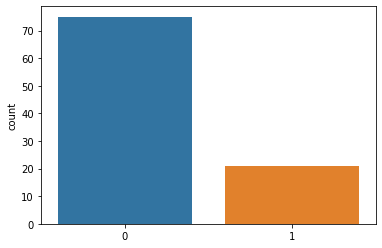

In [11]:
import seaborn as sns
ax = sns.countplot(x=y, data=df2)
print(df2['End'].value_counts())

## Data preprocessing

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
sm = SMOTE(random_state=11)
X1_train, y1_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [13]:
unique, count = np.unique(y1_train, return_counts=True)
y1_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y1_train_smote_value_count

{0: 61, 1: 61}

In [14]:
print(y1_train.shape)
print(X1_train.shape)

(122,)
(122, 35)


In [15]:
new_df = pd.DataFrame(X1_train)
new_df1 = pd.DataFrame(y1_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.829993,-1.528278,-0.164399,-0.265372,-0.235702,1.795055,-0.202721,-0.207948,-0.604635,-0.475191,...,1.207824,-0.312902,-0.726848,1.851035,-0.070421,0.247548,0.983448,-0.852803,-1.054093,2.309401
1,0.829993,0.526247,-0.164399,-0.265372,-0.235702,-0.557086,-0.202721,0.376601,0.394327,2.104417,...,-0.918600,0.683888,0.746365,-0.324318,0.189360,-0.366856,0.476722,1.172604,0.948683,-0.433013
2,0.829993,0.868667,-0.164399,-0.265372,-0.235702,-0.557086,-0.202721,0.141238,-0.604635,-0.475191,...,-0.370014,-0.616193,-0.413489,-0.855476,-0.274156,1.872744,-0.536729,1.172604,0.948683,-0.433013
3,0.829993,1.964414,-0.164399,-0.265372,-0.235702,1.795055,-0.202721,-0.377718,-0.604635,-0.475191,...,-0.286420,-0.464915,-0.336707,-0.531989,-1.097806,3.606947,0.476722,1.172604,0.948683,-0.433013
4,0.829993,-1.048889,-0.164399,-0.265372,-0.235702,1.795055,-0.202721,-0.844586,-0.604635,-0.475191,...,0.486825,-0.375981,-0.522790,0.674100,-0.875137,3.309655,1.743537,-0.852803,0.948683,-0.433013


## Feature Selection

Accuracy: 100.00 % 


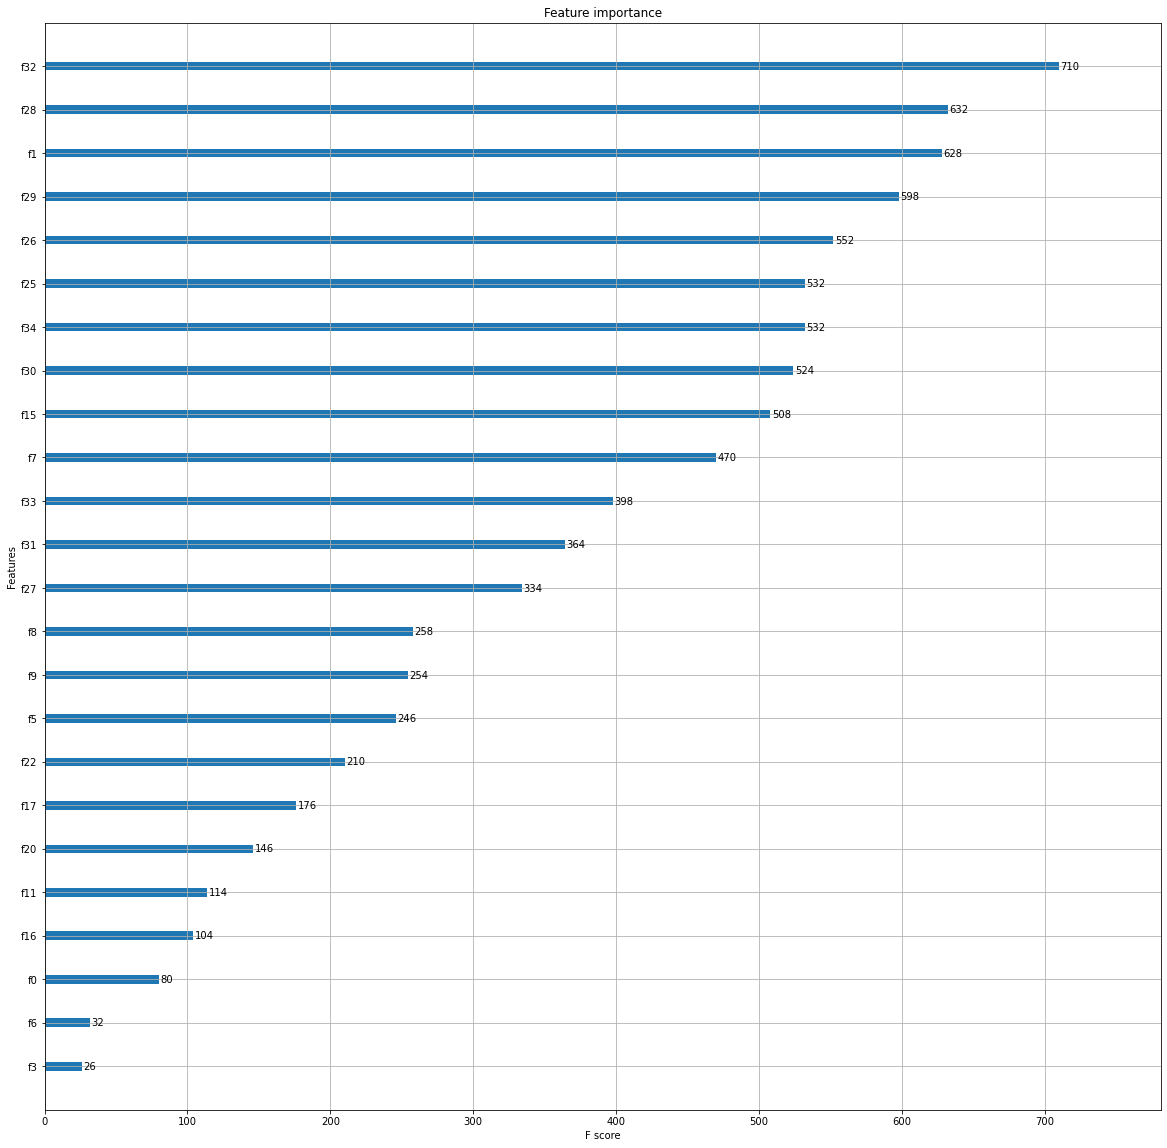

In [16]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X1_train, y1_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y_train)):
    if ans[i] == y_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('cli-1.jpg',dpi=1200)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

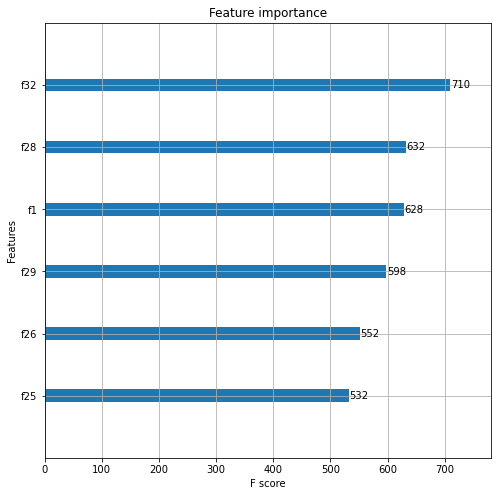

In [17]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=6, importance_type='weight') #or gain, cover.
#plt.savefig('cli-2.jpg',dpi=1200)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

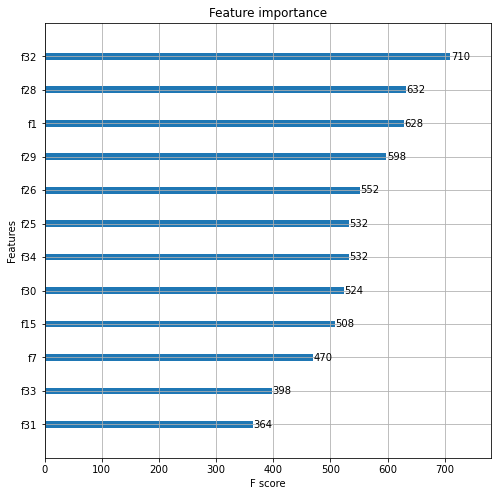

In [18]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=12, importance_type='weight') #or gain, cover.
#plt.savefig('cli-2.jpg',dpi=1200)

In [19]:
feat_labels[[32,28,1,29,26,25,34,30,15,7,33,31]]

Index(['LGE', 'LVSV', 'Age', 'CLVMI', 'LVEDV', 'LVEF', 'RVNC', 'NCC', 'Beta',
       'BMI', 'Rvabnormalities', 'Noseg'],
      dtype='object')

In [20]:
X0 = X[:,[32,28,1,29,26,25,34,30,15,7,33,31]]
X1 = X_train[:,[32,28,1,29,26,25,34,30,15,7,33,31]]
X2 = X1_train[:,[32,28,1,29,26,25,34,30,15,7,33,31]]
X3 = X_test[:,[32,28,1,29,26,25,34,30,15,7,33,31]]
y0 = y
y1 = y_train
y2 = y1_train
y3 = y_test

print("the true all data:")
print(X0.shape)
print(y0.shape)
print("the true train data:")
print(X1.shape) #
print(y1.shape)
print("the generate train data:")
print(X2.shape) #
print(y2.shape)
print("the true test data:")
print(X3.shape) #
print(y3.shape)

the true all data:
(96, 12)
(96,)
the true train data:
(76, 12)
(76,)
the generate train data:
(122, 12)
(122,)
the true test data:
(20, 12)
(20,)


In [21]:
# save the data
#data_df = pd.DataFrame(X0)
#writer = pd.ExcelWriter('nn.xlsx')
#data_df.to_excel(writer,'page_1',float_format='%.5f')
#writer.save() 

## Select modeling method

In [22]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

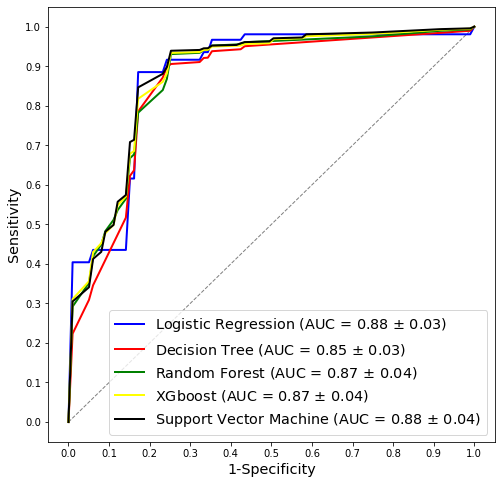

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 4, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X2, y2):
    probas_ = clf1.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X2, y2):
    probas_ = clf2.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X2, y2):
    probas_ = clf3.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X2, y2):
    probas_ = clf4.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X2, y2):
    probas_ = clf5.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('cli-ROC1.jpg',dpi=1200)
plt.show()

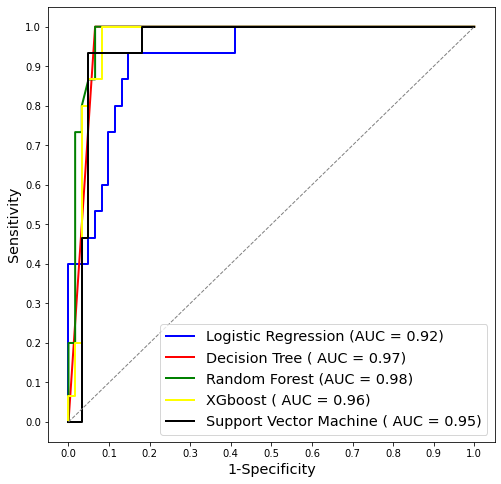

In [24]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
###################################################################
probas_ = clf1.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf2.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Decision Tree ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Random Forest (AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf4.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='yellow', alpha=1, lw=2, linestyle='-',label='XGboost ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf5.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='black', alpha=1, lw=2, linestyle='-',label='Support Vector Machine ( AUC = %0.2f)' % roc_auc) 
###################################################################

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC2.jpg',dpi=1200)
plt.show()

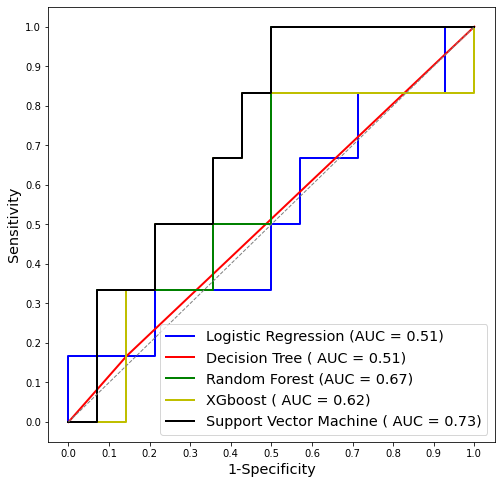

In [25]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
###################################################################
probas_ = clf1.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf2.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Decision Tree ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Random Forest (AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf4.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='y', alpha=1, lw=2, linestyle='-',label='XGboost ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf5.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='black', alpha=1, lw=2, linestyle='-',label='Support Vector Machine ( AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('B-RFE-ROC3.jpg',dpi=1200)
plt.show()

## Modeling and test

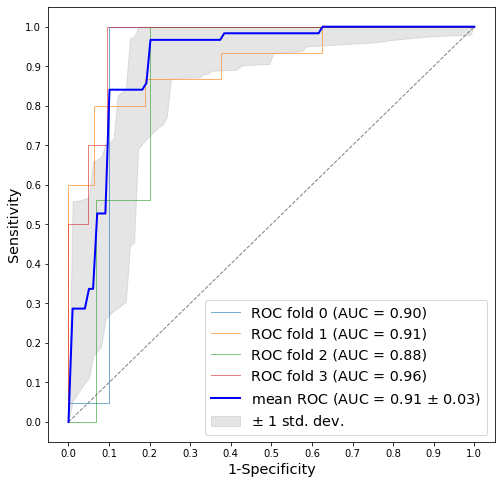

In [26]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 4, test_size = 0.25, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X2, y2):
    probas_ = model.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('cli-ROC3.jpg',dpi=1200)
plt.show()

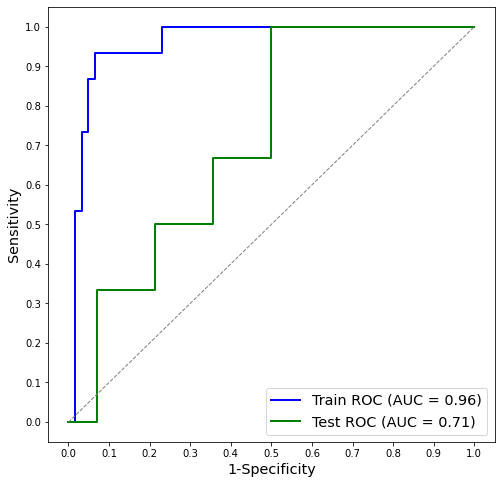

In [27]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('cli-ROC4.jpg',dpi=1200)
plt.show()

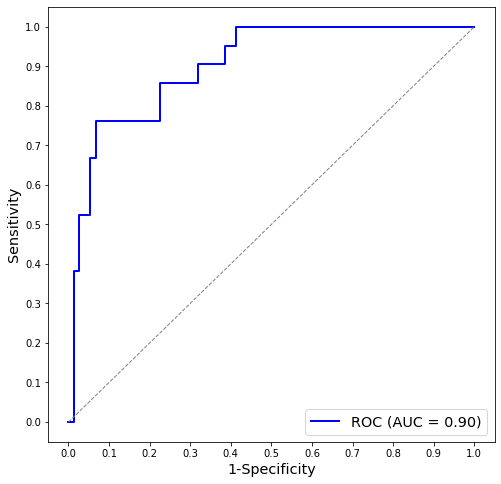

In [36]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='ROC (AUC = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC4-new.jpg',dpi=1200)
plt.show()

In [28]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,53,1
1,8,14


In [29]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,12,4
1,2,2


In [31]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df2['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,65,5
1,10,16


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.881578947368421
Precision =  0.6363636363636364
Recall =  0.9333333333333333
F1 Score =  0.7567567567567568


In [33]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.7
Precision =  0.5
Recall =  0.3333333333333333
F1 Score =  0.4


In [34]:
print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.84375
Precision =  0.6153846153846154
Recall =  0.7619047619047619
F1 Score =  0.6808510638297872


In [37]:
predictions = model.predict_proba(X0)
predictions

array([[0.07334006, 0.92665994],
       [0.07866018, 0.92133982],
       [0.09742767, 0.90257233],
       [0.95394645, 0.04605355],
       [0.17634617, 0.82365383],
       [0.71000942, 0.28999058],
       [0.07337794, 0.92662206],
       [0.08556182, 0.91443818],
       [0.09608522, 0.90391478],
       [0.24073944, 0.75926056],
       [0.5       , 0.5       ],
       [0.67237501, 0.32762499],
       [0.18581106, 0.81418894],
       [0.96799005, 0.03200995],
       [0.26112367, 0.73887633],
       [0.61674939, 0.38325061],
       [0.96489943, 0.03510057],
       [0.85517872, 0.14482128],
       [0.98208023, 0.01791977],
       [0.97427833, 0.02572167],
       [0.11123196, 0.88876804],
       [0.94988783, 0.05011217],
       [0.07492457, 0.92507543],
       [0.07339108, 0.92660892],
       [0.9666378 , 0.0333622 ],
       [0.99280637, 0.00719363],
       [0.11222309, 0.88777691],
       [0.10216012, 0.89783988],
       [0.07336584, 0.92663416],
       [0.07334157, 0.92665843],
       [0.

In [62]:
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('clinical_pre.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 